# matplotlib基础

### 面授班讲义  by 杨庆跃
请安装最新版本Jupyter notebook进行编程实验

## 关于matplotlib
Matplotlib是Python的2D绘图库，以跨平台的交互式环境生成出版质量级别的图形。通过Matplotlib，开发者可以仅需要几行代码，便可以生成直方图、条形图、散点图、趋势图、箱图等各种图形。  
matplotlib主页在这里[documentation](https://matplotlib.org/api/index.html).

## 目录
- 简单图形绘制
- 图形各部分详解
- 精细化制图
- 同一区域绘制多个图形subplot
- 各种常用图形介绍
- 图形保存

首先引入matplotlib包:    
为了能让图形在notebook展示，加入%matplotlib inline  
mapplotlib依赖于numpy，引入numpy

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"] #这行和下一行是解决图形标签无法显示中文的问题
plt.rcParams['axes.unicode_minus'] = False

## 简单图形绘制

在一张图上画出cos、sin、sqrt函数的完整图像。  
数据图的绘制可分为如下几个步骤：
- 导入相关工具包
- 准备数据，本例用numpy数组
- 绘制图形
- 设置图形样式
- 设置标题、坐标轴、刻度、图例
- 添加文字说明、注解
- 显示、保存绘图结果  


上述步骤可能反复调整

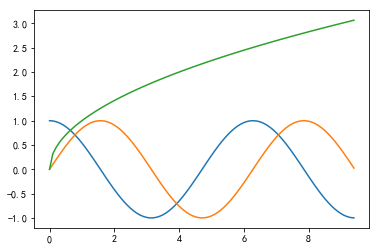

In [157]:
x = np.arange(0, 3 * np.pi, 0.1) #0到3Pi之间每隔0.1生成一个值
cos = np.cos(x)
sin = np.sin(x)
sqrt =np.sqrt(x)

# 开始绘图
plt.plot(x,cos)
plt.plot(x,sin)
plt.plot(x,sqrt)
plt.show()

【思考】短短几行代码即可生成一张图，但信息是否足够？  
参考PPT讲解：Matplotlib图形各组成部分详解

## 图形细化

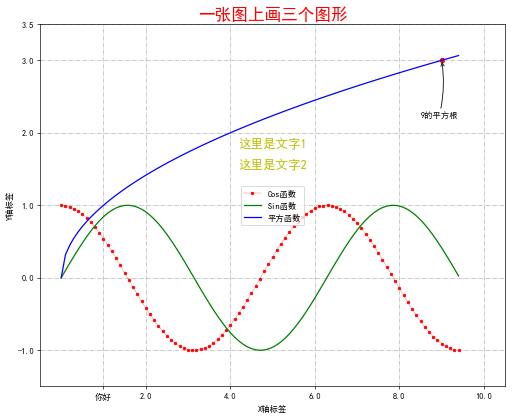

In [14]:
x = np.arange(0, 3 * np.pi, 0.1) #0到3Pi之间每隔0.1生成一个值
cos = np.cos(x)
sin = np.sin(x)
sqrt =np.sqrt(x)

plt.figure(figsize=(10,8),dpi=60) #设置图形尺寸和分辨率DPI

# 开始绘图
plt.plot(x,cos,color='red', linewidth=0.3, linestyle='-', marker='.', label='Cos函数')
plt.plot(x,sin,color='green', label='Sin函数')
plt.plot(x,sqrt,color='blue', label='平方函数')

#下面是一些细化参数
plt.xlabel('X轴标签')
plt.ylabel('Y轴标签')
plt.title('一张图上画三个图形',fontsize=20,color="red") 
plt.legend(loc = 'center') #图例
plt.xlim(-0.5,10.5) #改变X轴刻度范围
plt.ylim(-1.5,3.5)  #改变X轴刻度范围
plt.xticks([1,2, 4, 6, 8, 10], ['你好','2.0', '4.0', '6.0', '8.0', '10.0']) #改变X轴刻度
plt.yticks([-1.0, 0.0, 1.0, 2.0, 3.0, 3.5],['-1.0', '0.0', '1.0', '2.0', '3.0', '3.5'])#改变Y轴刻度

# 特殊点添加注解
plt.scatter([9,],[np.sqrt(9),], 30, color ='r')  # 使用散点图放大当前点
plt.annotate('9的平方根', xy=(9, np.sqrt(9)), xytext=(8.5, 2.2), fontsize=10, color='#090909', arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0.1', color='#090909'))

# 添加文字
plt.text(4.2, 1.8, '这里是文字1', color='y', fontsize=15)
plt.text(4.2, 1.5, '这里是文字2', color='y', fontsize=15)

# 显示网格线
plt.grid(True,linestyle='-.')    

#保存图片，务必放到show方法之前
plt.savefig('d:/ai/apic.png',dpi=60)

# 显示绘图
plt.show()

In [6]:
plt.legend?

#### 使用savefig函数保存图片
注意：要在plt.show函数之前调用

In [ ]:
plt.savefig('d:/ai/apic.png',dpi=60)

最全的参数设置参考这里 [documentation](https://matplotlib.org/api/pyplot_api.html).

## Subplots 
在同一制图区域(figure)绘制多个图形(plot)

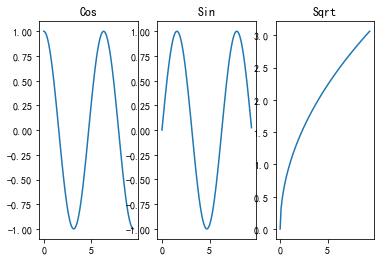

In [17]:
x = np.arange(0, 3 * np.pi, 0.1) #0到3Pi之间每隔0.1生成一个值
cos = np.cos(x)
sin = np.sin(x)
sqrt= np.sqrt(x)

# 设置整个绘图区域为1行3列
plt.subplot(1,3, 1)

# 画第1个图
plt.plot(x, cos)
plt.title('Cos')

# 画第2个图
plt.subplot(1,3, 2)
plt.plot(x, sin)
plt.title('Sin')

# 画第3个图
plt.subplot(1,3, 3)
plt.plot(x, sqrt)
plt.title('Sqrt')



#plt.savefig('data/apic.png')

# 显示绘图
plt.show()

subplot更详细信息参见 [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## 其他常用图形

#### 饼图

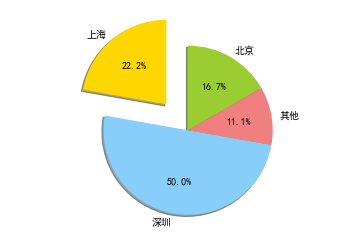

In [18]:
labels='北京','上海','深圳','其他'
sizes=15,20,45,10
colors='yellowgreen','gold','lightskyblue','lightcoral'
explode=0,0.4,0,0 #每块离开中心的距离
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=30)
plt.axis('equal') # 设置横轴和纵轴大小相等，这样饼才是圆的
plt.show()

### 直方图

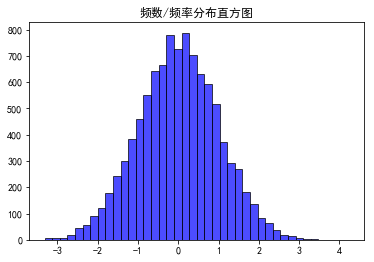

In [20]:
data = np.random.randn(10000)

#主要参数
#bins:直方图的长条形数目，可选项，默认为10#
#facecolor:长条形的颜色
#edgecolor:长条形边框的颜色
#alpha:透明度
plt.hist(data, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
plt.title("频数/频率分布直方图")
plt.show()

### 条形图

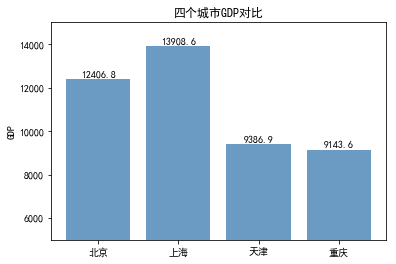

In [13]:
# 构建数据
GDP = [12406.8,13908.57,9386.87,9143.64]
# 绘图
plt.bar(range(4), GDP, align = 'center',color='steelblue', alpha = 0.8)
# 添加轴标签
plt.ylabel('GDP')
# 添加标题
plt.title('四个城市GDP对比')
# 添加刻度标签
plt.xticks(range(4),['北京','上海','天津','重庆'])
# 设置Y轴的刻度范围
plt.ylim([5000,15000])

# 为每个条形图添加数值标签
for x,y in enumerate(GDP):
    plt.text(x,y+100,'%s' %round(y,1),ha='center')# 显示图形plt.show()
plt.show()

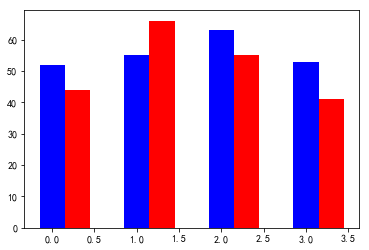

In [14]:
# 条形图_两组数据
index = np.arange(4)
sales_BJ=[52,55,63,53]
sales_SH=[44,66,55,41]
bar_width=0.3
plt.bar(index,sales_BJ,bar_width,color='b') #sales_BJ直方图
plt.bar(index+bar_width,sales_SH,bar_width,color='r') #叠加sales_SH的直方图（主要是加一个bar_width）
#plt.bar(index,sales_SH,bar_width,color='r',bottom=sales_BJ) #层叠图
plt.show()

### 箱形图
又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图

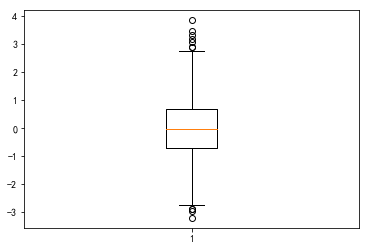

In [20]:
np.random.seed(100)#生成随机数
data=np.random.normal(size=1000,loc=0,scale=1)
plt.boxplot(data,sym='o',whis=1.5)#sym='o'异常值的形状 ,whis=1.5用于调节上下垂直线的长度
plt.show()

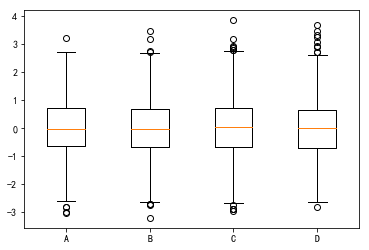

In [43]:
#多个箱线图在一张图上
np.random.seed(100)#生成随机数
data=np.random.normal(size=(1000,4),loc=0,scale=1) #1000个值的4维数组
lables = ['A','B','C','D']
plt.boxplot(data,labels=lables)
plt.show()

### 散点图

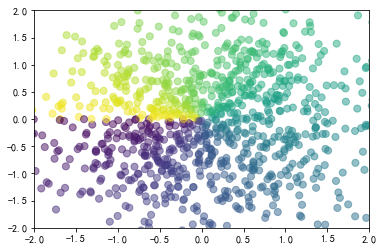

In [33]:
n = 1024
x = np.random.normal(0, 1, n)  # 均值为0, 方差为1的随机数
y = np.random.normal(0, 1, n)

# 计算颜色值
color = np.arctan2(y, x)

# 绘制散点图
plt.scatter(x, y, s = 50, c = color, alpha = 0.5)

# 设置坐标轴范围
plt.xlim((-2, 2))
plt.ylim((-2, 2))


plt.show()

matplotlib能绘制的图形汇总 [documentation](https://matplotlib.org/gallery.html).

## Seaborn
Seaborn在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图。

d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


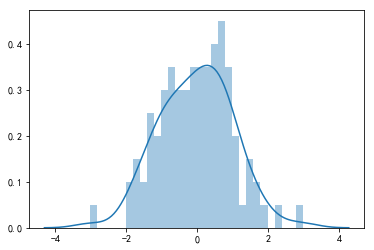

In [4]:
import seaborn as sns

x = np.random.normal(size=100)
sns.distplot(x,bins=30)

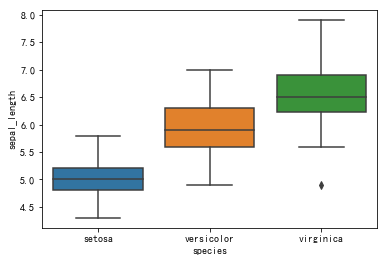

In [5]:
import seaborn as sns

# 数据集
iris = sns.load_dataset('iris')

# seaborn进行绘图
sns.boxplot(x="species", y="sepal_length", data=iris) 
#sns.distplot(iris.sepal_length)
#sns.pairplot(iris)
#sns.swarmplot(x="species", y="petal_length", data=iris)
plt.show()

seaborn自带的数据集 [documentation](https://github.com/mwaskom/seaborn-data).

## 课堂练习1
针对数据集iris进行图形化展示，以获得对数据的了解，绘制图形包括：  
- 直方图与箱图（看分布情况）
- 散点图（看相关关系）

数据字段：sepal_length	sepal_width	petal_length	petal_width	species  
萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

In [42]:
import pandas as pd
df = pd.read_csv('d:/ai/data/iris.csv',header=0)
df.head()
#df.name.unique() #看不同值
#df.name.value_counts() #看属于每类花的数量

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(array([ 4.,  1.,  4.,  2.,  5., 16.,  9.,  4.,  1.,  6., 13.,  8.,  7.,
         3.,  6., 10.,  9.,  7.,  5.,  2., 11.,  4.,  1.,  1.,  4.,  1.,
         0.,  1.,  4.,  1.]),
 array([4.3 , 4.42, 4.54, 4.66, 4.78, 4.9 , 5.02, 5.14, 5.26, 5.38, 5.5 ,
        5.62, 5.74, 5.86, 5.98, 6.1 , 6.22, 6.34, 6.46, 6.58, 6.7 , 6.82,
        6.94, 7.06, 7.18, 7.3 , 7.42, 7.54, 7.66, 7.78, 7.9 ]),
 <a list of 30 Patch objects>)

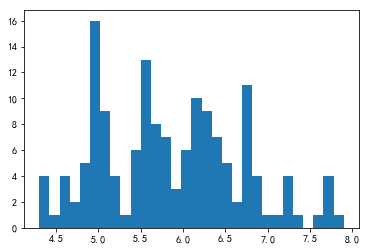

In [45]:
#画直方图
plt.hist(df.sepal_length,bins=30)

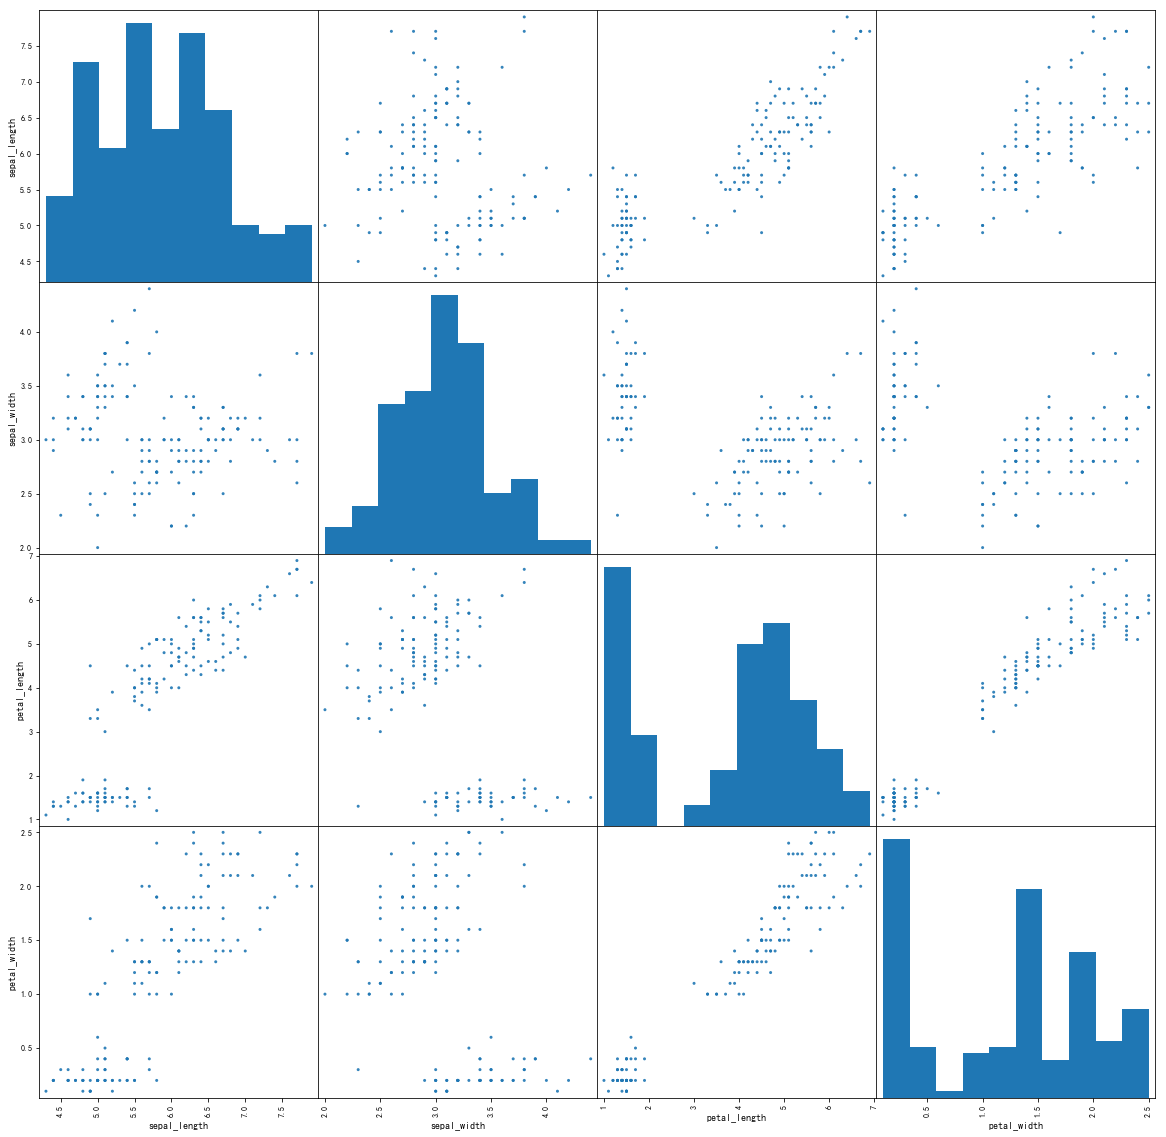

In [55]:
#画散点图矩阵，这是Pandas对Matplotlib的包装

#pd.scatter_matrix(df) #官方已不建议用这种方法，参考下一种
pd.plotting.scatter_matrix(df,figsize=(20,20),alpha=0.9)
pd.plotting.scatter_matrix?

## 课堂练习2
针对数据集titanic进行图形化展示，以获得对数据的了解，绘制图形包括：  
- 直方图与箱图（看分布情况）
- 散点图（看相关关系）
- 堆积柱状图(按类别看对比情况)

数据字段：survived	pclass	sex	age	sibsp	parch	fare	embarked	class	who	adult_male	deck	embark_town	alive	alone  
幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船